# Загрузка необходимых библиотек

In [33]:
from ml_tools import *

# Установка параметров

In [34]:
# Constants
DATA_PATH = './data/'
OLD_DATA_PATH = './old_data/'
MODELS_PATH = './models/'
TARGET_COL = 'Ценазапомещение,тг.'
RAW_CSV_FILENAME = 'Для расчета/ЖК Яркий новый шаблон v1.csv'
FINAL_FILENAME = 'Для расчета/result.xlsx'

pd.options.display.max_rows = 100

# Загрузка обученной модели и исходных данных

In [36]:
best_model = load_model(MODELS_PATH + 'prices.pkl')

data_raw = pd.read_csv(DATA_PATH + RAW_CSV_FILENAME, 
                    encoding='cp1251', 
                    sep=';', 
                    decimal=',')

data_raw.head()

,Проект,Номер дома,Номер квартиры,Тип планировки,Тип планировки 2,"Общая площадь, кв,м,",Ссылка на планировку,Комнатность,Тип,Паркинг,...,ComplexId,Площадь гардеробной1,Площадь гардеробной2,Площадь гардеробной3,Площадь гардеробной4,Совмещенный санузел,Высота потолков,Акция,Угловая,Над проходом
0,ЖК Яркий,2,1,2 Е,NaN,48.6,https://drive.google.com/uc?id=1o0uH4jT10V4UBh...,2,квартира,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Да,Нет
1,ЖК Яркий,2,2,СТ Г,NaN,31.7,https://drive.google.com/uc?id=1aSns6NDs5TXhNT...,0,квартира,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Нет,Нет
2,ЖК Яркий,2,3,2 Б,NaN,36.2,https://drive.google.com/uc?id=1NueU_6ny8urxho...,2,квартира,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Нет,Нет
3,ЖК Яркий,2,4,2 В,NaN,42.5,https://drive.google.com/uc?id=1aLGvXuiu1JT1zG...,2,квартира,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Нет,Нет
4,ЖК Яркий,2,5,2 А,NaN,33.5,https://drive.google.com/uc?id=16_MWLgMVqmAMJh...,2,квартира,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Нет,Нет


In [37]:
data_raw_descr = get_describe(data_raw)
data_raw_descr

,dtypes,nulls_percent,nulls,count,unique,median,top,freq,mean,std,min,25%,50%,75%,max
Проект,object,0,0,410,1,NaN,ЖК Яркий,410,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Номер дома,int64,0,0,410,NaN,2.00,NaN,NaN,2,0,2,2,2,2,2
Номер квартиры,int64,0,0,410,NaN,205.50,NaN,NaN,205.5,118.501,1,103.25,205.5,307.75,410
Тип планировки,object,0,0,410,20,NaN,СТ Б,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Тип планировки 2,float64,100,410,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Общая площадь, кв,м,",float64,0,0,410,NaN,34.90,NaN,NaN,37.3666,10.7457,22.1,28.8,34.9,41.1,65
Ссылка на планировку,object,0,0,410,76,NaN,https://drive.google.com/uc?id=15c5CTfO9VNUHxi...,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Комнатность,int64,0,0,410,NaN,2.00,NaN,NaN,1.31707,1.12624,0,0,2,2,3
Тип,object,0,0,410,1,NaN,квартира,410,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Паркинг,float64,100,410,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
data_raw.drop(['Акция',
 'Высота потолков',
 'Над проходом',
 'Размер 9 комнаты',
 'Совмещенный санузел',
 'Угловая'], axis=1, inplace=True)

In [39]:
data = prepare_data(data_raw, HOUSES_TO_DROP=[])
data_descr = get_describe(data)
data_descr

,dtypes,nulls_percent,nulls,count,mean,median,std,min,25%,50%,75%,max
Номер дома,int64,0,0,410.0,2.000000,2.00,0.000000,2.0,2.0,2.00,2.0,2.0
"Общая площадь, кв,м,",float64,0,0,410.0,37.366585,34.90,10.745749,22.1,28.8,34.90,41.1,65.0
Комнатность,int64,0,0,410.0,1.704878,2.00,0.694530,1.0,1.0,2.00,2.0,3.0
Этаж,int64,0,0,410.0,4.124390,4.00,1.945879,1.0,2.0,4.00,6.0,7.0
Секция,int64,0,0,410.0,5.019512,5.00,2.790941,1.0,2.0,5.00,8.0,9.0
Линия,float64,0,0,410.0,0.000000,0.00,0.000000,0.0,0.0,0.00,0.0,0.0
Студия,int64,0,0,410.0,0.387805,0.00,0.487845,0.0,0.0,0.00,1.0,1.0
Количество сан узлов,float64,0,0,410.0,4.000000,4.00,0.000000,4.0,4.0,4.00,4.0,4.0
Размер сан узла №1,float64,0,0,410.0,3.660000,4.00,0.881713,1.6,3.5,4.00,4.2,5.1
Размер сан узла №2,float64,0,0,410.0,0.501463,0.00,1.262956,0.0,0.0,0.00,0.0,3.8


In [40]:
final_cols = ['Номер дома',
 'Общая площадь, кв,м,',
 'Комнатность',
 'Этаж',
 'Секция',
 'Линия',
 'Студия',
 'Количество сан узлов',
 'Размер сан узла №1',
 'Размер сан узла №2',
 'Размер сан узла №3',
 'Размер сан узла №4',
 'Размер коридора',
 'Гардеробная',
 'Кухня',
 'Количество балконов',
 'Размер балкона №1',
 'Размер балкона №2',
 'Размер балкона №3',
 'Размер балкона №4',
 'Размер балкона №5',
 'Терраса №1',
 'Терраса №2',
 'Терраса №3',
 'Терраса №4',
 'Терраса №5',
 'Жилая площадь за кв,м,',
#  'Размер первой комнаты',
 'Размер второй комнаты',
 'Размер третьей комнаты',
 'Размер четвертой комнаты',
 'Размер 5 комнаты',
 'Размер 6 комнаты',
 'Размер 7 комнаты',
 'Размер 8 комнаты',
 'Ценазапомещение,тг.',
 'Площадь гардеробных']

In [41]:
prices = best_model.predict(data[final_cols].drop(TARGET_COL, axis=1).fillna(0)).astype(int)
data_raw[TARGET_COL] = prices
data[TARGET_COL] = prices

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

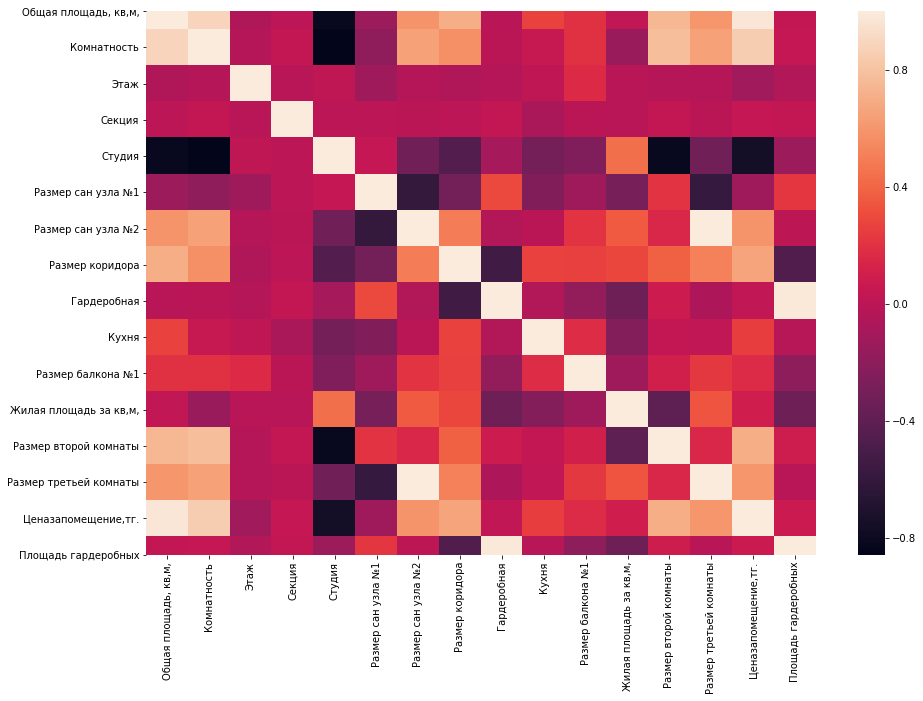

In [43]:
plt.figure(figsize=(15, 10))
data_non_constant = data.loc[:, (data != data.iloc[0]).any()]
sns.heatmap(data_non_constant.corr(method='spearman'));

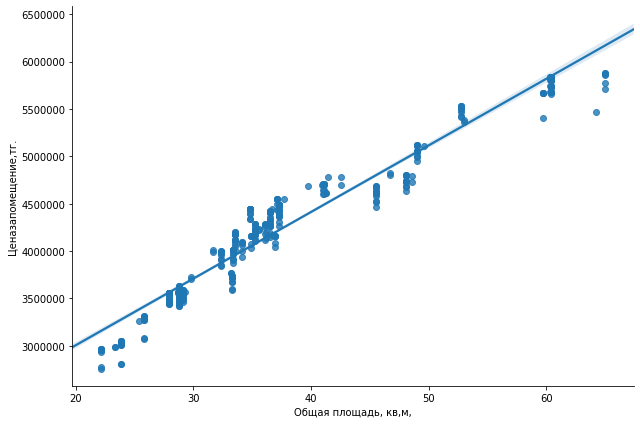

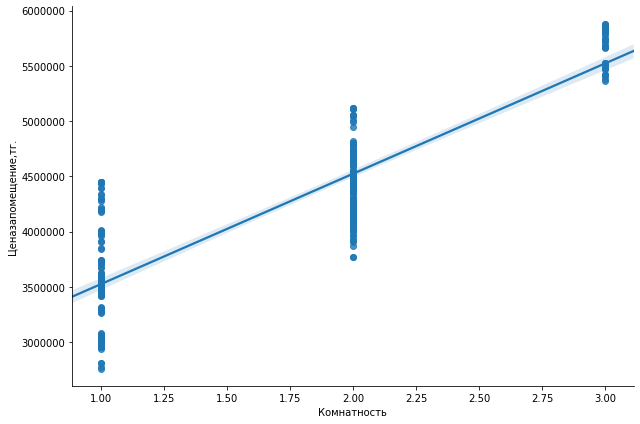

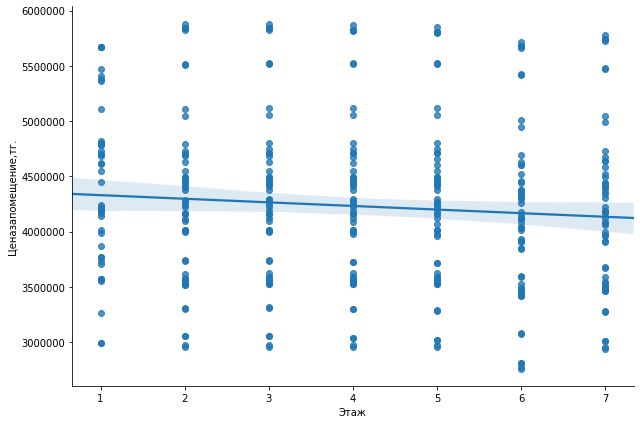

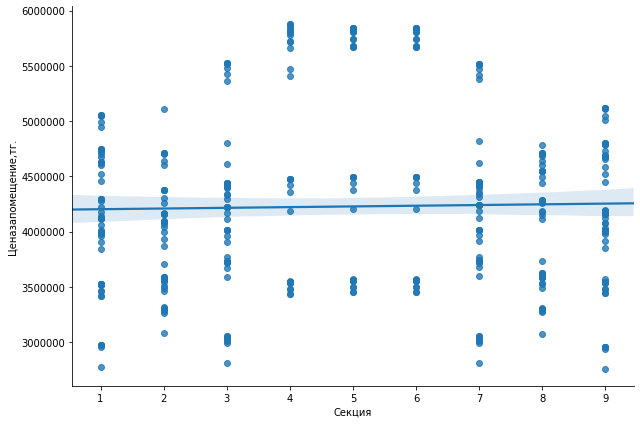

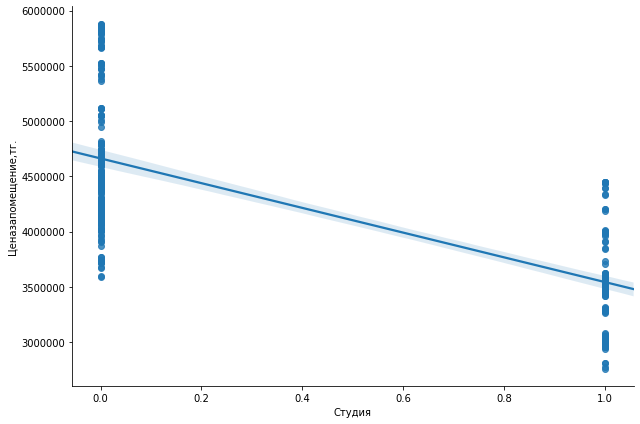

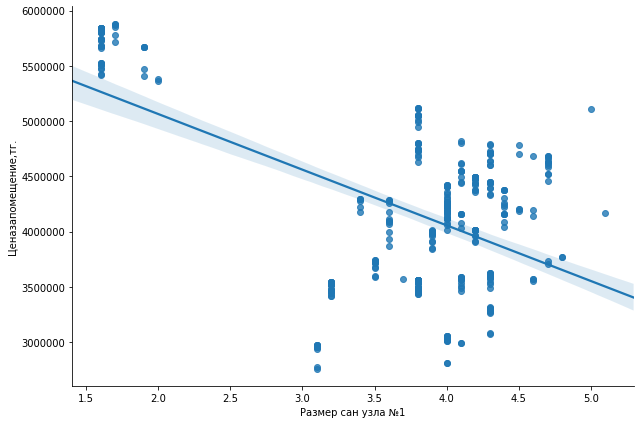

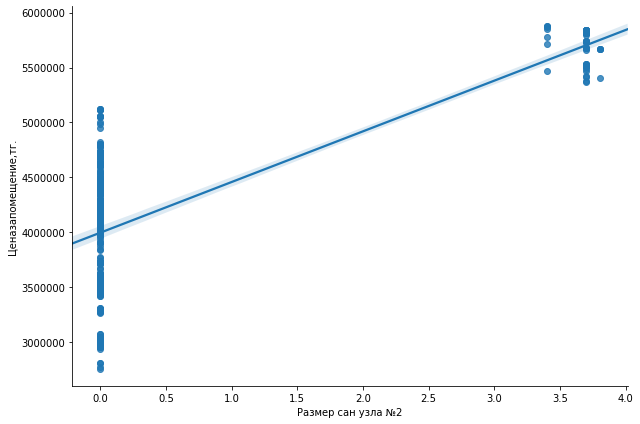

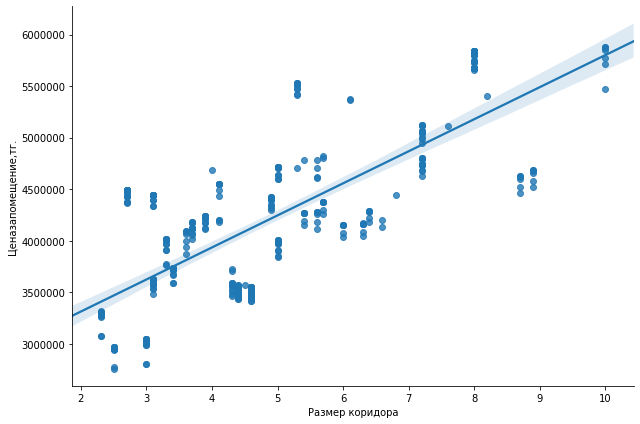

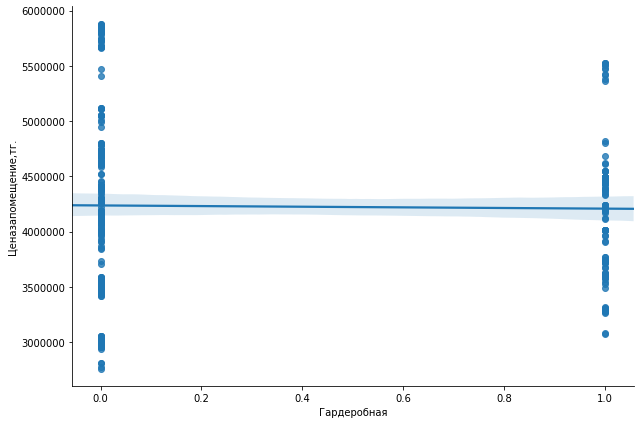

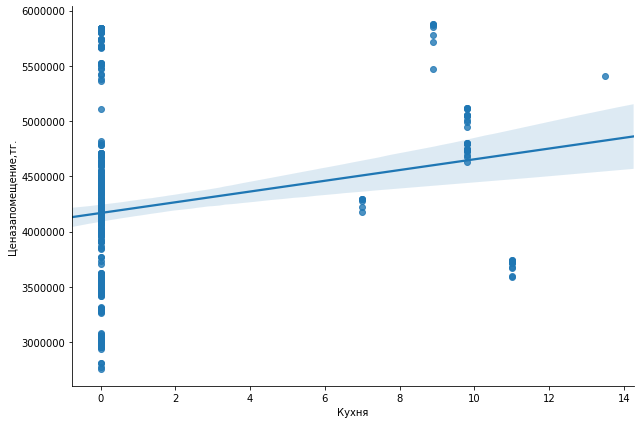

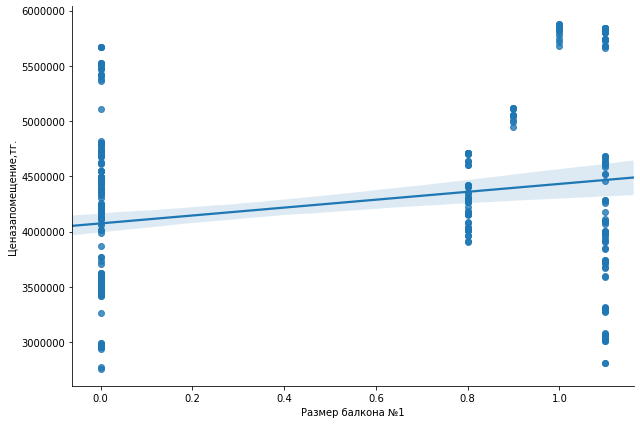

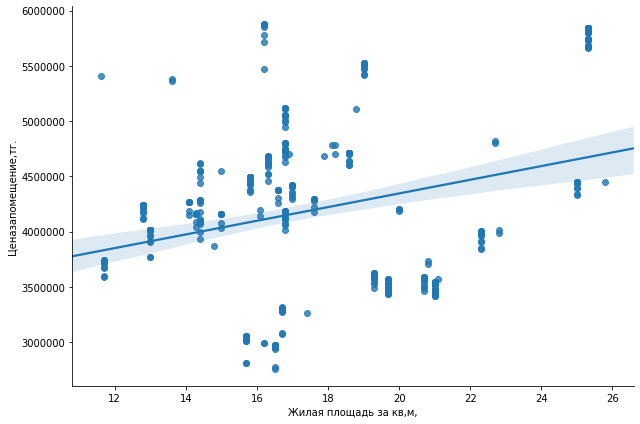

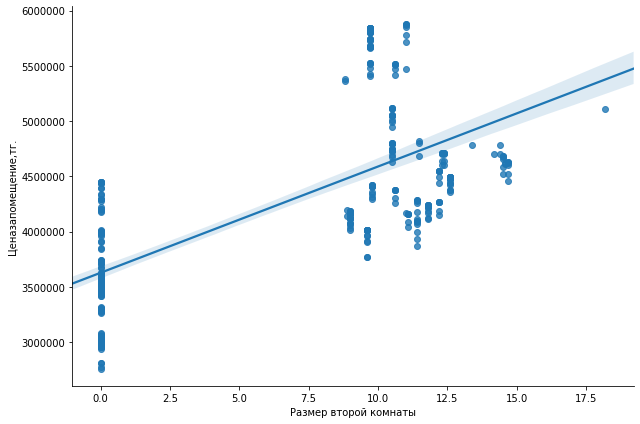

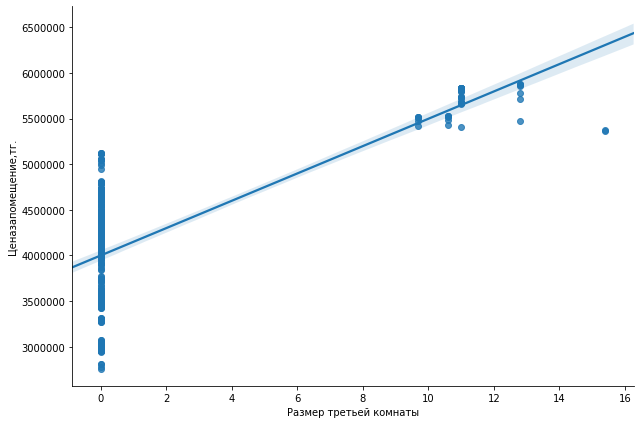

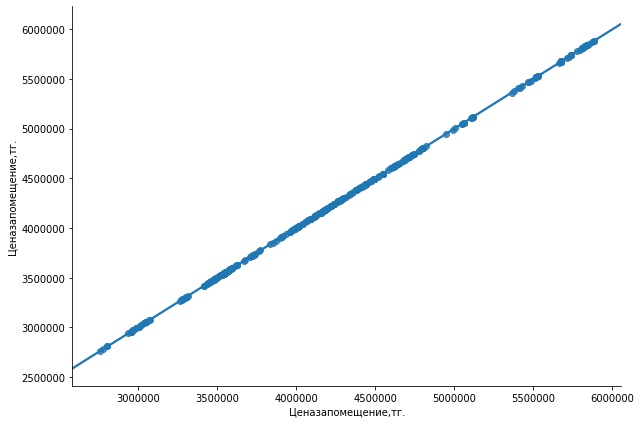

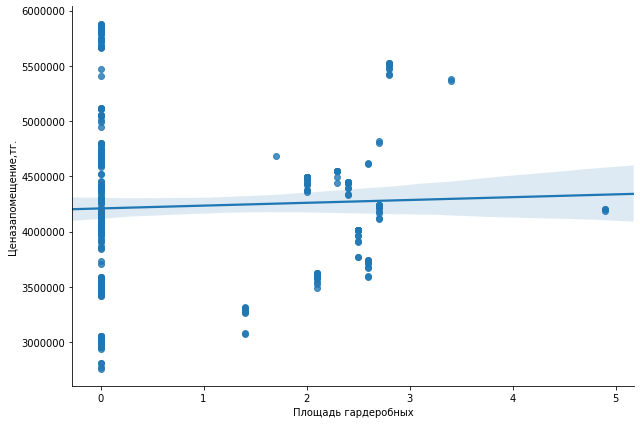

In [44]:
# # show = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
for col in list(data_non_constant):
    sns.lmplot(col, TARGET_COL, data_non_constant, fit_reg=True, height=6, aspect=1.5);
    plt.show();

In [45]:
data_raw.to_excel(DATA_PATH + FINAL_FILENAME, index=False)